# Random Forest

In [59]:
import numpy as np
import pandas as pd

In [60]:
# Đọc dữ liệu từ pandas
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [61]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [62]:
X = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [63]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 31


In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sử dụng OHE để mã hóa các categories của dữ liệu, Label Encode để mã hóa lại đầu ra của y
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [65]:
X_origin = X.copy()
y_origin = y.copy()

In [66]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [67]:
X_encode['Attrition'] = X_encode['Attrition'].map({'Yes':1, 'No':0})

In [68]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,0,279,8,61,5130,24907,1,23,10,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,1392,3,56,2909,23159,1,11,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,40,3468,16632,9,12,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,4,17,17,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,42,9991,21457,4,15,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,87,6142,5174,1,20,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,63,5390,13243,2,14,17,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
y_encode = label_encoder.fit_transform(y)

In [70]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

<Axes: >

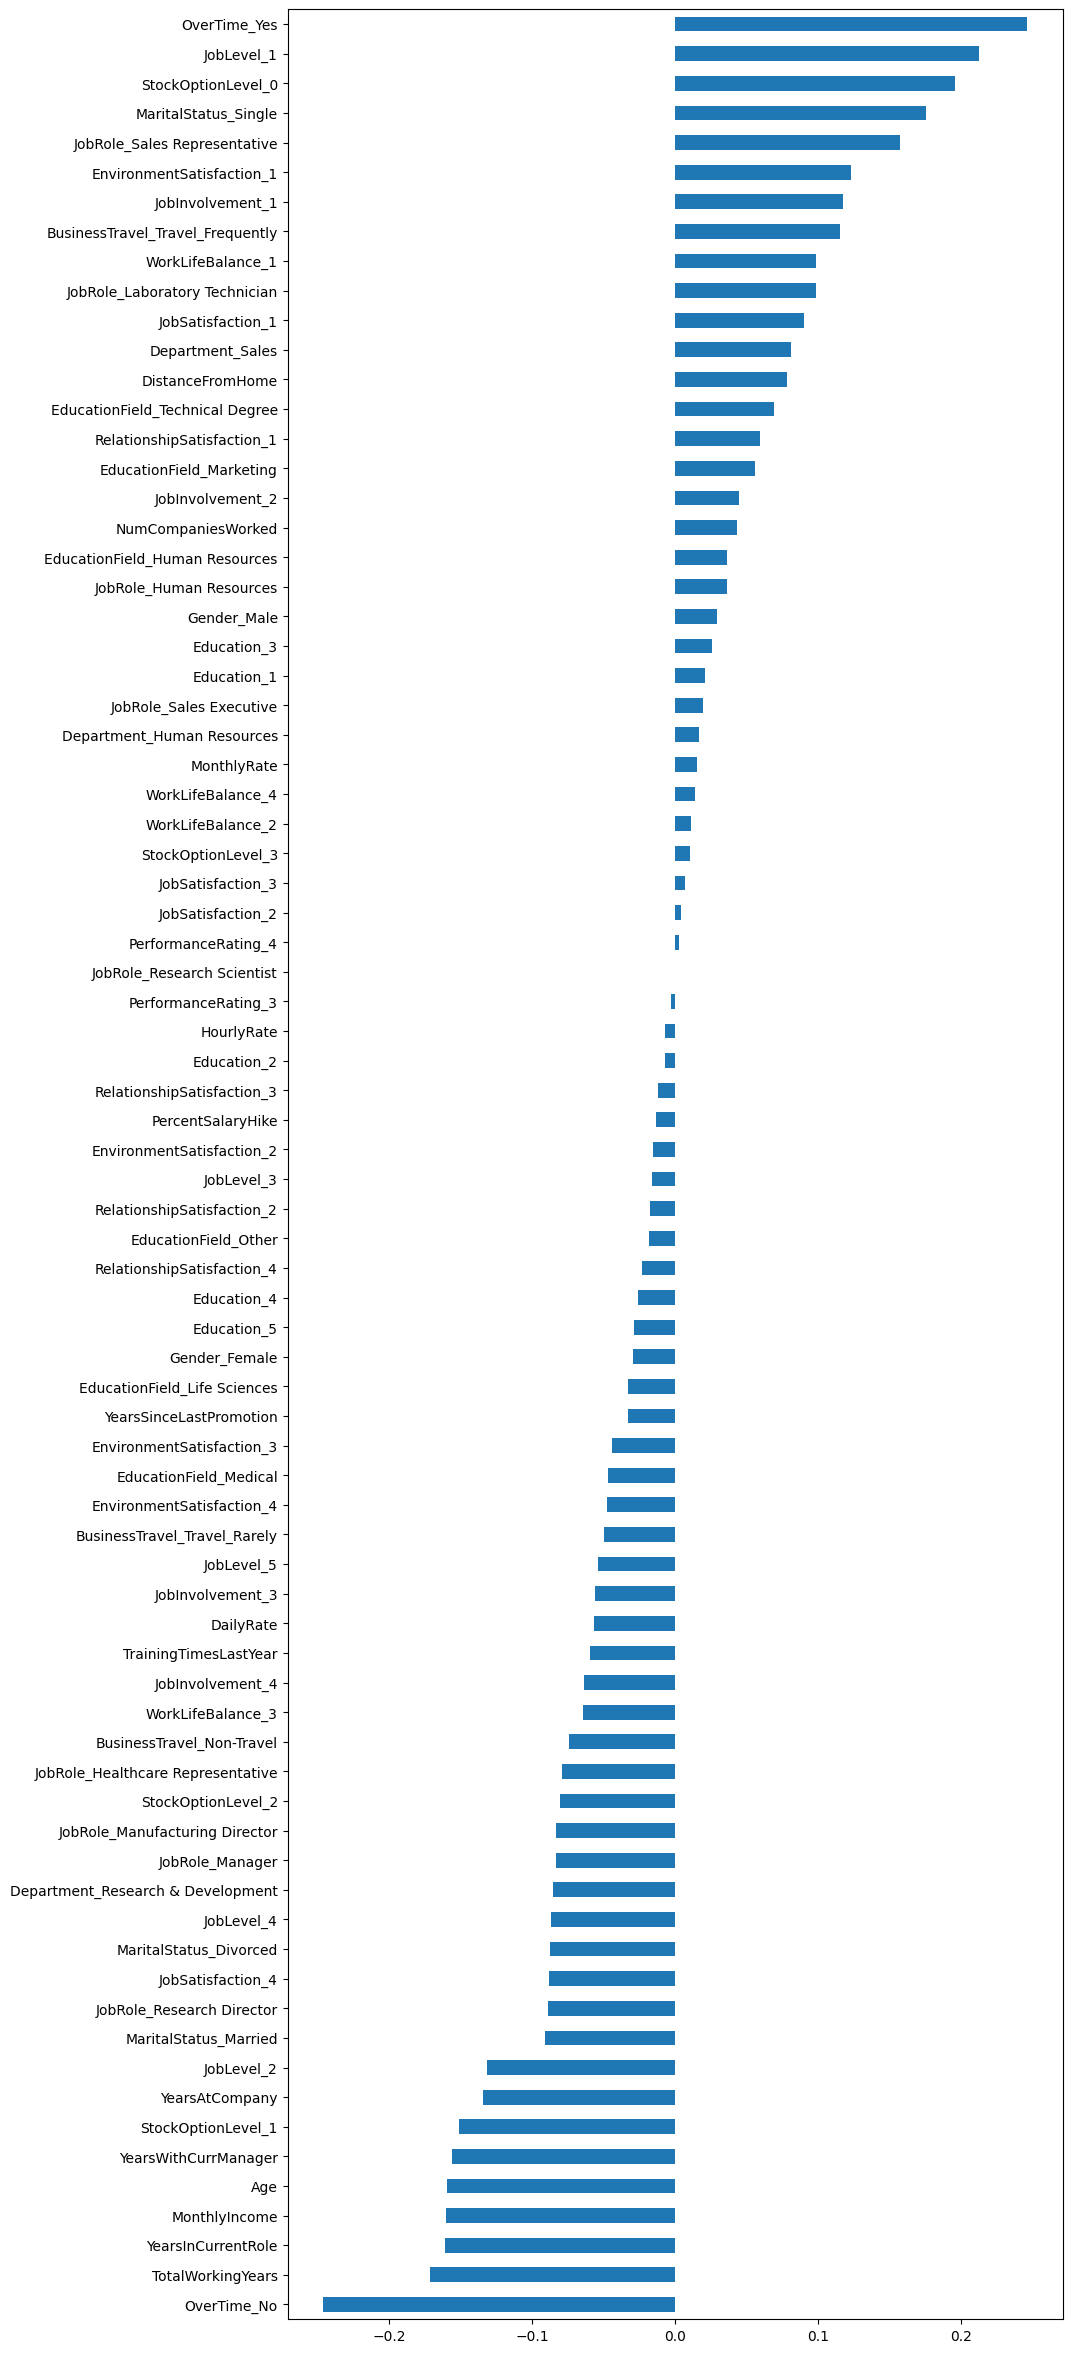

In [71]:
X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [72]:
feature_correlation = X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

59

In [73]:
X_encode = X_encode[model_col]

In [74]:
X_encode

,OverTime_No,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel_1,YearsAtCompany,JobLevel_2,MaritalStatus_Married,...,JobRole_Laboratory Technician,WorkLifeBalance_1,BusinessTravel_Travel_Frequently,JobInvolvement_1,EnvironmentSatisfaction_1,JobRole_Sales Representative,MaritalStatus_Single,StockOptionLevel_0,JobLevel_1,OverTime_Yes
0,0.0,8,4,5993,41,5,0.0,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,10,7,5130,49,7,1.0,10,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7,0,2090,37,0,0.0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,8,7,2909,33,0,0.0,8,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,6,2,3468,27,2,1.0,2,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,17,2,2571,36,3,1.0,5,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,9,7,9991,39,7,1.0,7,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.0,6,2,6142,27,3,1.0,6,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1468,1.0,17,6,5390,49,8,0.0,9,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
import numpy as np
from collections import Counter

class Node:
    """Node trong cây quyết định"""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    """Cây quyết định - thành phần của Random Forest"""
    def __init__(self, max_depth=10, min_samples_split=2, n_features=None,
                 criterion='gini', class_weight=None, min_samples_leaf=1,
                 max_leaf_nodes=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_leaf_nodes = max_leaf_nodes
        self.n_features = n_features
        self.criterion = criterion
        self.class_weight = class_weight
        self.root = None
        self.leaf_count = 0
        self.feature_importances_ = None  # Thêm thuộc tính này
        self.n_features_total = None  # Tổng số features

    def _calculate_sample_weights(self, y):
        """Tính trọng số mẫu dựa trên class"""
        if self.class_weight == 'balanced':
            classes = np.unique(y)
            n_samples = len(y)
            weights = np.ones(len(y))
            for cls in classes:
                class_weight = n_samples / (len(classes) * np.sum(y == cls))
                weights[y == cls] = class_weight
            return weights
        return np.ones(len(y))

    def _split(self, X_column, split_thresh):
        """Chia dữ liệu thành 2 nhóm"""
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _gini(self, y, sample_weights=None):
        """Tính Gini có trọng số - OPTIMIZED"""
        if len(y) == 0:
            return 0
        if sample_weights is None:
            hist = np.bincount(y.astype(int))
            ps = hist / len(y)
            return 1.0 - np.sum(ps ** 2)

        classes = np.unique(y)
        gini = 1.0
        total_weight = np.sum(sample_weights)

        for cls in classes:
            cls_weight = np.sum(sample_weights[y == cls])
            p = cls_weight / total_weight if total_weight > 0 else 0
            gini -= p ** 2
        return gini

    def _entropy(self, y, sample_weights=None):
        """Tính entropy có trọng số - OPTIMIZED"""
        if len(y) == 0:
            return 0
        if sample_weights is None:
            hist = np.bincount(y.astype(int))
            ps = hist / len(y)
            return -np.sum([p * np.log2(p) for p in ps if p > 0])

        classes = np.unique(y)
        entropy = 0
        total_weight = np.sum(sample_weights)

        for cls in classes:
            cls_weight = np.sum(sample_weights[y == cls])
            p = cls_weight / total_weight if total_weight > 0 else 0
            if p > 0:
                entropy -= p * np.log2(p)
        return entropy

    def _information_gain(self, y, X_column, threshold, sample_weights=None):
        """Tính Information Gain có trọng số"""
        if self.criterion == 'gini':
            parent_score = self._gini(y, sample_weights)
        else:
            parent_score = self._entropy(y, sample_weights)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        if sample_weights is None:
            sample_weights = np.ones(len(y))

        if self.criterion == 'gini':
            left_score = self._gini(y[left_idxs], sample_weights[left_idxs])
            right_score = self._gini(y[right_idxs], sample_weights[right_idxs])
        else:
            left_score = self._entropy(y[left_idxs], sample_weights[left_idxs])
            right_score = self._entropy(y[right_idxs], sample_weights[right_idxs])

        total_weight = np.sum(sample_weights)
        left_weight = np.sum(sample_weights[left_idxs])
        right_weight = np.sum(sample_weights[right_idxs])

        child_score = (left_weight * left_score + right_weight * right_score) / total_weight

        return parent_score - child_score

    def _most_common_label(self, y):
        """Tìm nhãn phổ biến nhất"""
        if len(y) == 0:
            return 0
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def _weighted_most_common(self, y, sample_weights):
        """Tìm label phổ biến nhất theo trọng số"""
        classes = np.unique(y)
        weighted_counts = {}
        for cls in classes:
            weighted_counts[cls] = np.sum(sample_weights[y == cls])
        return max(weighted_counts, key=weighted_counts.get)

    def _best_split(self, X, y, feat_idxs, sample_weights=None):
        """Tìm feature và threshold tốt nhất với trọng số"""
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            if len(thresholds) > 20:
                thresholds = np.percentile(X_column, np.linspace(5, 95, 20))

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr, sample_weights)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold, best_gain

    def fit(self, X, y):
        """Huấn luyện cây quyết định"""
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        self.n_features_total = X.shape[1]
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])

        # Khởi tạo feature importances
        self.feature_importances_ = np.zeros(self.n_features_total)

        self.leaf_count = 0
        sample_weights = self._calculate_sample_weights(y)
        self.root = self._grow_tree(X, y, sample_weights=sample_weights)

        # Chuẩn hóa feature importances
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ = self.feature_importances_ / np.sum(self.feature_importances_)

    def _grow_tree(self, X, y, depth=0, sample_weights=None):
        """Xây dựng cây đệ quy với trọng số và tính feature importance"""
        if sample_weights is None:
            sample_weights = np.ones(len(y))

        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if n_samples == 0:
            return Node(value=0)

        if (depth >= self.max_depth or
            n_labels == 1 or
            n_samples < self.min_samples_split or
            (self.max_leaf_nodes and self.leaf_count >= self.max_leaf_nodes)):
            leaf_value = self._weighted_most_common(y, sample_weights)
            self.leaf_count += 1
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh, best_gain = self._best_split(X, y, feat_idxs, sample_weights)

        if best_feature is None:
            leaf_value = self._weighted_most_common(y, sample_weights)
            self.leaf_count += 1
            return Node(value=leaf_value)

        # Tính feature importance: weighted information gain
        weighted_n_samples = np.sum(sample_weights)
        self.feature_importances_[best_feature] += weighted_n_samples * best_gain

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)

        if (len(left_idxs) < self.min_samples_leaf or
            len(right_idxs) < self.min_samples_leaf):
            leaf_value = self._weighted_most_common(y, sample_weights)
            self.leaf_count += 1
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1, sample_weights[left_idxs])
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1, sample_weights[right_idxs])

        return Node(best_feature, best_thresh, left, right)

    def predict(self, X):
        """Dự đoán cho tập dữ liệu"""
        if hasattr(X, 'values'):
            X = X.values
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        """Duyệt cây để dự đoán"""
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [76]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2,
                 max_features='sqrt', criterion='gini', random_state=None,
                 class_weight='balanced', balanced_bootstrap=False,
                 min_samples_leaf=1, max_leaf_nodes=None, max_samples=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_leaf_nodes = max_leaf_nodes
        self.max_features = max_features
        self.criterion = criterion
        self.random_state = random_state
        self.class_weight = class_weight
        self.balanced_bootstrap = balanced_bootstrap
        self.max_samples = max_samples
        self.trees = []
        self.feature_importances_ = None  # Thêm thuộc tính này

    def _bootstrap_samples(self, X, y):
        """Bootstrap sampling thông thường"""
        n_samples = X.shape[0]
        n_bootstrap = int(n_samples * self.max_samples)
        idxs = np.random.choice(n_samples, n_bootstrap, replace=True)
        return X[idxs], y[idxs]

    def _bootstrap_samples_balanced(self, X, y):
        """Bootstrap với undersampling class đa số"""
        unique, counts = np.unique(y, return_counts=True)
        minority_class = unique[np.argmin(counts)]
        majority_class = unique[np.argmax(counts)]

        minority_idxs = np.where(y == minority_class)[0]
        majority_idxs = np.where(y == majority_class)[0]

        selected_minority = minority_idxs
        n_majority = min(len(minority_idxs) * 2, len(majority_idxs))
        selected_majority = np.random.choice(majority_idxs, n_majority, replace=True)

        selected_idxs = np.concatenate([selected_minority, selected_majority])
        np.random.shuffle(selected_idxs)

        return X[selected_idxs], y[selected_idxs]

    def fit(self, X, y):
        """Huấn luyện Random Forest"""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        n_features = X.shape[1]
        if self.max_features == 'sqrt':
            n_features_tree = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_features_tree = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            n_features_tree = self.max_features
        else:
            n_features_tree = n_features

        # Khởi tạo feature importances
        self.feature_importances_ = np.zeros(n_features)

        self.trees = []
        for i in range(self.n_estimators):
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_leaf_nodes=self.max_leaf_nodes,
                n_features=n_features_tree,
                criterion=self.criterion,
                class_weight=self.class_weight
            )

            if self.balanced_bootstrap:
                X_sample, y_sample = self._bootstrap_samples_balanced(X, y)
            else:
                X_sample, y_sample = self._bootstrap_samples(X, y)

            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            # Cộng dồn feature importances từ từng cây
            self.feature_importances_ += tree.feature_importances_

        # Tính trung bình feature importances trên tất cả các cây
        self.feature_importances_ = self.feature_importances_ / self.n_estimators

        return self

    def _most_common_label(self, y):
        """Voting"""
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        """Dự đoán bằng voting"""
        if hasattr(X, 'values'):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

    def predict_proba(self, X):
        """Dự đoán xác suất"""
        if hasattr(X, 'values'):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)

        n_classes = len(np.unique(predictions))
        probas = np.zeros((len(X), n_classes))

        for i, pred in enumerate(tree_preds):
            for cls in pred:
                probas[i, int(cls)] += 1

        probas = probas / self.n_estimators
        return probas

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, classification_report
import numpy as np
import pandas as pd

def evaluate(model, X_train, X_test, y_train, y_test):
    print("\n========== TRAINING MODEL ==========")
    model.fit(X_train, y_train)
    print("Model has been fitted.\n")
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("\n========== TRAINING RESULTS ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"ACCURACY: {accuracy_score(y_train, y_train_pred):.4f}")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)))

    print("\n========== TEST RESULTS ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"ACCURACY: {accuracy_score(y_test, y_test_pred):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)))

    # Tìm threshold tối ưu theo F1
    print("\n========== FINDING OPTIMAL THRESHOLD ==========")
    y_test_proba = model.predict_proba(X_test)[:, 1]

    best_threshold = 0.0
    best_f1 = 0.0

    for threshold in np.arange(0.2, 0.6, 0.05):
        y_pred = (y_test_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Optimal threshold: {best_threshold}")
    print(f"Best F1-score: {best_f1:.4f}")

    # Đánh giá lại TEST với threshold tối ưu
    y_test_pred_opt = (y_test_proba >= best_threshold).astype(int)

    print("\n========== TEST RESULTS WITH OPTIMAL THRESHOLD ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_test_pred_opt))
    print(f"ACCURACY: {accuracy_score(y_test, y_test_pred_opt):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred_opt, output_dict=True)))


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

X_encode_copy = X_encode
y_encode_copy = y_encode

X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)

# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_origin_t2, y_train_origin_t2)

In [79]:
# Test 1: GINI
rf_gini = RandomForest(
    n_estimators=150,
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=15,          # Mỗi leaf ít nhất 15 samples
    max_features=0.5,             # Chỉ dùng 50% features
    max_samples=0.8,              # Chỉ dùng 80% data mỗi cây
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

In [80]:
evaluate(rf_gini, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[874 112]
 [ 40 150]]
ACCURACY: 0.8707
                    0           1  accuracy    macro avg  weighted avg
precision    0.956236    0.572519  0.870748     0.764378      0.894241
recall       0.886410    0.789474  0.870748     0.837942      0.870748
f1-score     0.920000    0.663717  0.870748     0.791858      0.878594
support    986.000000  190.000000  0.870748  1176.000000   1176.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[208  39]
 [ 15  32]]
ACCURACY: 0.8163
                    0          1  accuracy   macro avg  weighted avg
precision    0.932735   0.450704  0.816327    0.691720      0.855676
recall       0.842105   0.680851  0.816327    0.761478      0.816327
f1-score     0.885106   0.542373  0.816327    0.713740      0.830316
support    247.000000  47.000000  0.816327  294.000000    294.000000

========== FINDING OPTIMAL THRESHOLD ========

In [81]:
evaluate(rf_gini, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[768  95]
 [ 36 130]]
ACCURACY: 0.8727
                    0           1  accuracy    macro avg  weighted avg
precision    0.955224    0.577778  0.872692     0.766501      0.894334
recall       0.889919    0.783133  0.872692     0.836526      0.872692
f1-score     0.921416    0.664962  0.872692     0.793189      0.880044
support    863.000000  166.000000  0.872692  1029.000000   1029.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[317  53]
 [ 28  43]]
ACCURACY: 0.8163
                    0          1  accuracy   macro avg  weighted avg
precision    0.918841   0.447917  0.816327    0.683379      0.843023
recall       0.856757   0.605634  0.816327    0.731195      0.816327
f1-score     0.886713   0.514970  0.816327    0.700842      0.826863
support    370.000000  71.000000  0.816327  441.000000    441.000000

========== FINDING OPTIMAL THRESHOLD ========

In [82]:
evaluate(rf_gini, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[668  72]
 [ 30 112]]
ACCURACY: 0.8844
                    0           1  accuracy   macro avg  weighted avg
precision    0.957020    0.608696  0.884354    0.782858      0.900941
recall       0.902703    0.788732  0.884354    0.845718      0.884354
f1-score     0.929068    0.687117  0.884354    0.808092      0.890114
support    740.000000  142.000000  0.884354  882.000000    882.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[420  73]
 [ 42  53]]
ACCURACY: 0.8044
                    0          1  accuracy   macro avg  weighted avg
precision    0.909091   0.420635  0.804422    0.664863      0.830174
recall       0.851927   0.557895  0.804422    0.704911      0.804422
f1-score     0.879581   0.479638  0.804422    0.679610      0.814964
support    493.000000  95.000000  0.804422  588.000000    588.000000

========== FINDING OPTIMAL THRESHOLD ==========
Op

In [83]:
# Test 2: ENTROPY
rf_entropy = RandomForest(
    n_estimators=150,
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=15,          #  Mỗi leaf ít nhất 15 samples
    max_features=0.5,             #  Chỉ dùng 50% features
    max_samples=0.8,              #  MỚI: Chỉ dùng 80% data mỗi cây
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)

In [84]:
evaluate(rf_entropy, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[863 123]
 [ 42 148]]
ACCURACY: 0.8597
                    0           1  accuracy    macro avg  weighted avg
precision    0.953591    0.546125  0.859694     0.749858      0.887759
recall       0.875254    0.778947  0.859694     0.827100      0.859694
f1-score     0.912745    0.642082  0.859694     0.777414      0.869015
support    986.000000  190.000000  0.859694  1176.000000   1176.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[205  42]
 [ 17  30]]
ACCURACY: 0.7993
                    0          1  accuracy   macro avg  weighted avg
precision    0.923423   0.416667   0.79932    0.670045      0.842411
recall       0.829960   0.638298   0.79932    0.734129      0.799320
f1-score     0.874200   0.504202   0.79932    0.689201      0.815051
support    247.000000  47.000000   0.79932  294.000000    294.000000

========== FINDING OPTIMAL THRESHOLD ========

In [85]:
evaluate(rf_entropy, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[765  98]
 [ 34 132]]
ACCURACY: 0.8717
                    0           1  accuracy    macro avg  weighted avg
precision    0.957447    0.573913   0.87172     0.765680      0.895575
recall       0.886443    0.795181   0.87172     0.840812      0.871720
f1-score     0.920578    0.666667   0.87172     0.793622      0.879616
support    863.000000  166.000000   0.87172  1029.000000   1029.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[316  54]
 [ 28  43]]
ACCURACY: 0.8141
                    0          1  accuracy   macro avg  weighted avg
precision    0.918605   0.443299  0.814059    0.680952      0.842082
recall       0.854054   0.605634  0.814059    0.729844      0.814059
f1-score     0.885154   0.511905  0.814059    0.698529      0.825062
support    370.000000  71.000000  0.814059  441.000000    441.000000

========== FINDING OPTIMAL THRESHOLD ========

In [86]:
evaluate(rf_entropy, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)


========== TRAINING MODEL ==========
Model has been fitted.


========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[643  97]
 [ 25 117]]
ACCURACY: 0.8617
                    0           1  accuracy   macro avg  weighted avg
precision    0.962575    0.546729  0.861678    0.754652      0.895625
recall       0.868919    0.823944  0.861678    0.846431      0.861678
f1-score     0.913352    0.657303  0.861678    0.785328      0.872129
support    740.000000  142.000000  0.861678  882.000000    882.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[406  87]
 [ 36  59]]
ACCURACY: 0.7908
                    0          1  accuracy   macro avg  weighted avg
precision    0.918552   0.404110  0.790816    0.661331      0.835436
recall       0.823529   0.621053  0.790816    0.722291      0.790816
f1-score     0.868449   0.489627  0.790816    0.679038      0.807245
support    493.000000  95.000000  0.790816  588.000000    588.000000

========== FINDING OPTIMAL THRESHOLD ==========
Op

In [90]:
import matplotlib.pyplot as plt

def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

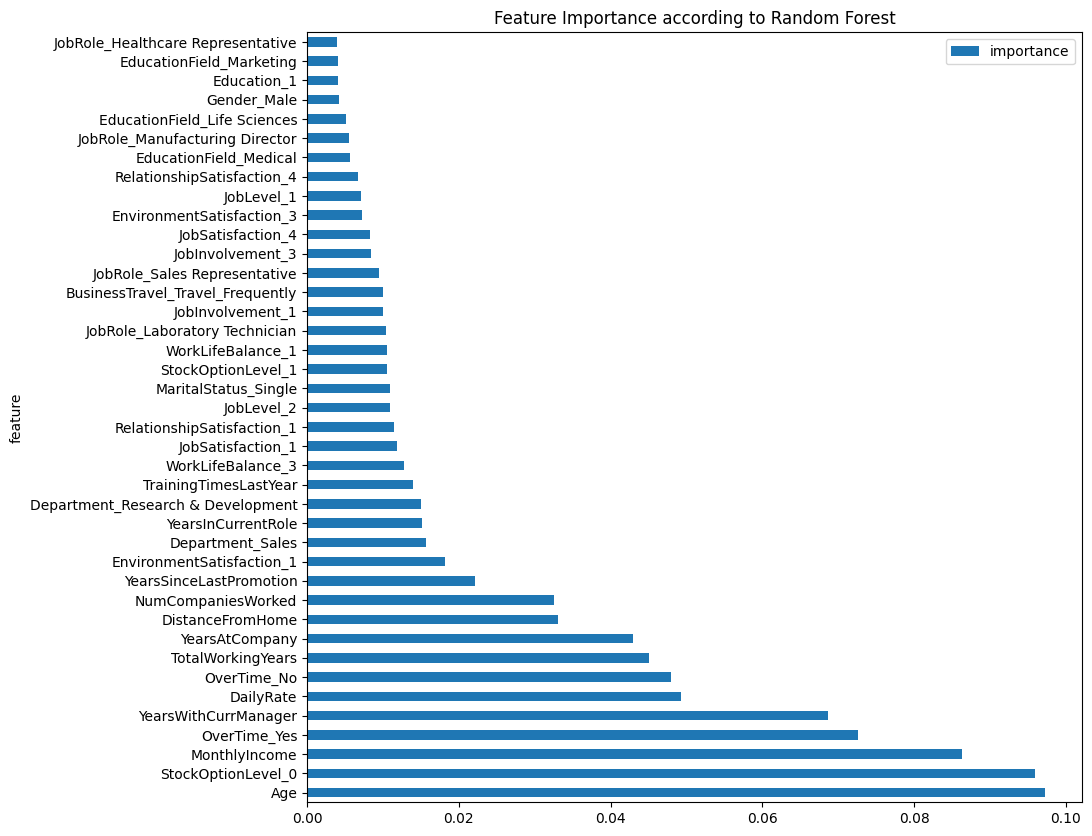

In [91]:
df = feature_imp(X_encode_copy, rf_gini)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

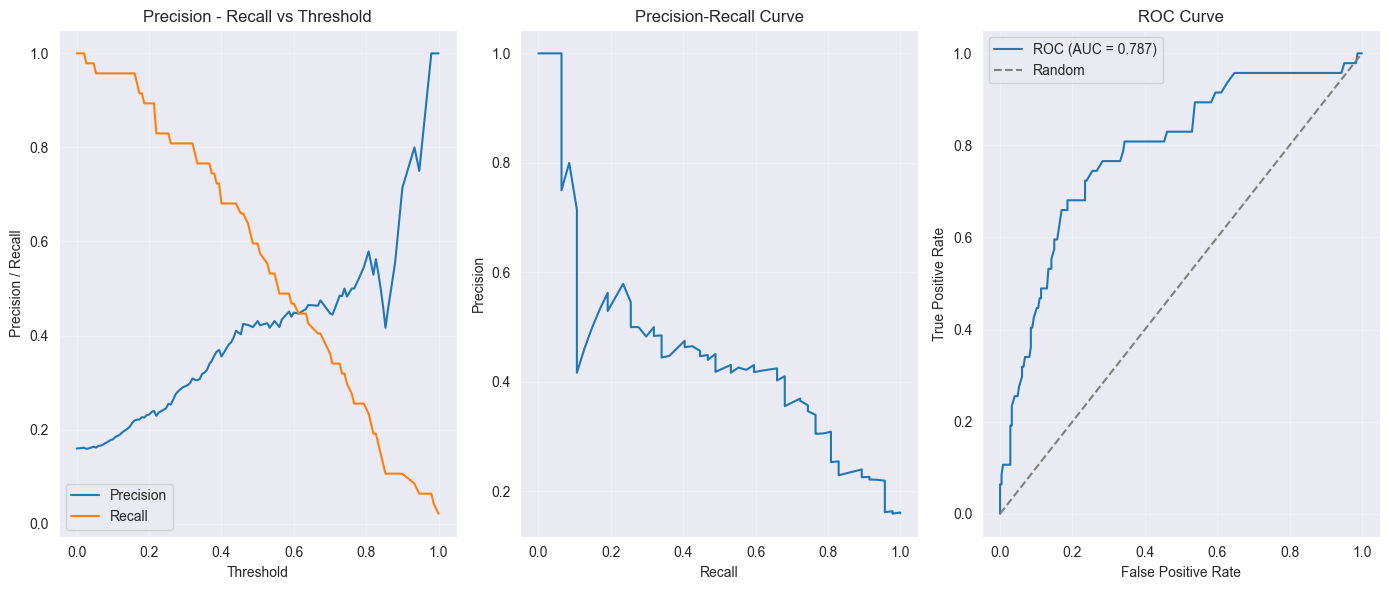

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_scores = rf_gini.predict_proba(X_test_origin_t1)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t1, y_scores)

plt.figure(figsize=(14, 6))

# 1. Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precision vs Recall (PR Curve)
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, alpha=0.3)

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t1, y_scores)
auc_score = roc_auc_score(y_test_origin_t1, y_scores)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

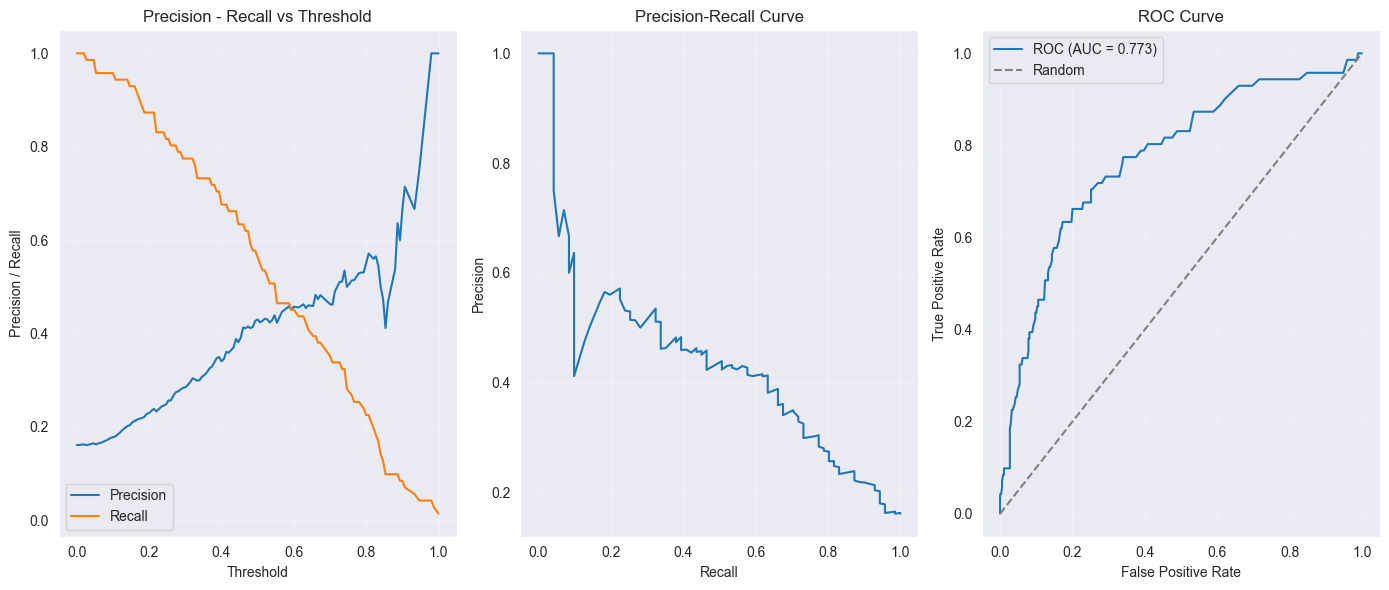

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_scores = rf_gini.predict_proba(X_test_origin_t2)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t2, y_scores)

plt.figure(figsize=(14, 6))

# 1. Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precision vs Recall (PR Curve)
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, alpha=0.3)

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t2, y_scores)
auc_score = roc_auc_score(y_test_origin_t2, y_scores)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

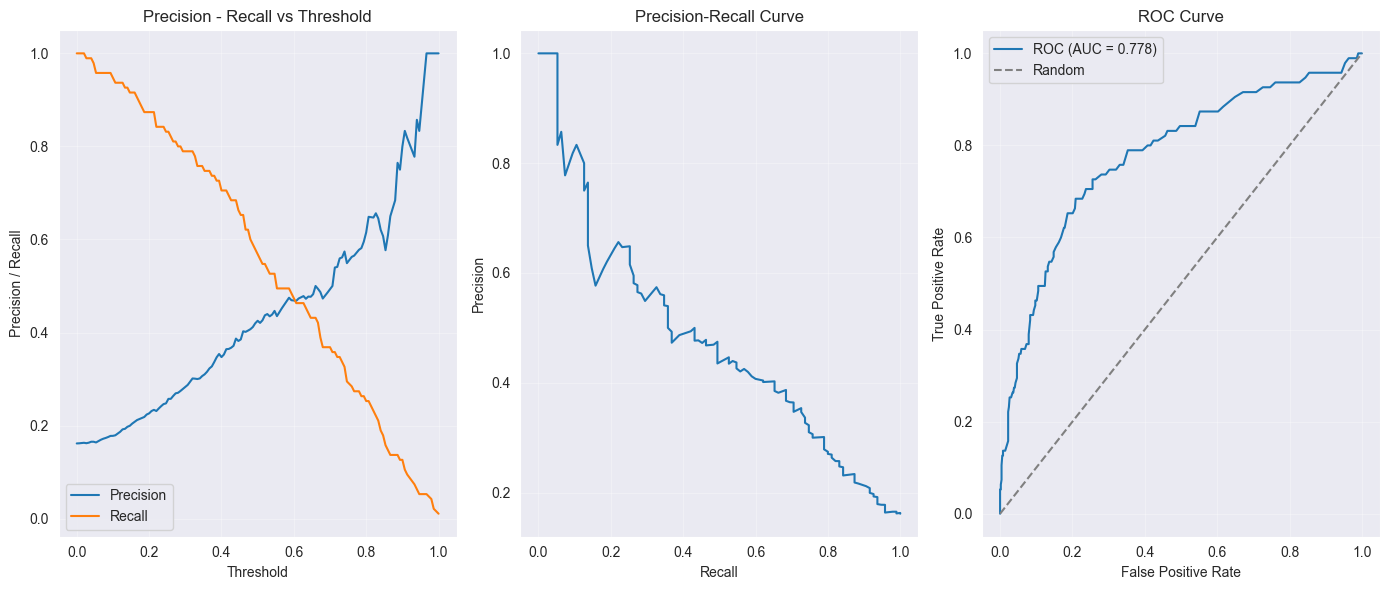

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_scores = rf_gini.predict_proba(X_test_origin_t3)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t3, y_scores)

plt.figure(figsize=(14, 6))

# 1. Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precision vs Recall (PR Curve)
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True, alpha=0.3)

# 3. ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t3, y_scores)
auc_score = roc_auc_score(y_test_origin_t3, y_scores)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [143]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction_comparison(model,
                               X_train_val, y_train_val,
                               X_test, y_test,
                               threshold=0.5):

    # --- TRAIN/VAL ---
    y_train_proba = model.predict_proba(X_train_val)[:, 1]
    y_train_pred = (y_train_proba >= threshold).astype(int)

    # --- TEST ---
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= threshold).astype(int)

    # --- VẼ HAI SUBPLOT ---
    plt.figure(figsize=(14, 6))

    # ====== PLOT TRAIN / VAL ======
    plt.subplot(1, 2, 1)
    idx_train = np.arange(len(y_train_val))

    correct_idx_train = idx_train[y_train_pred == y_train_val]
    wrong_idx_train = idx_train[y_train_pred != y_train_val]

    plt.scatter(correct_idx_train, y_train_val[correct_idx_train],
                color='green', label='Dự đoán đúng', s=30)
    plt.scatter(wrong_idx_train,  y_train_val[wrong_idx_train],
                color='red', label='Dự đoán sai', s=30, marker='x')

    plt.title("So sánh Dự đoán và Thực tế (Train + Validation)")
    plt.xlabel("Index")
    plt.ylabel("Nhãn (0/1)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # ====== PLOT TEST ======
    plt.subplot(1, 2, 2)
    idx_test = np.arange(len(y_test))

    correct_idx_test = idx_test[y_test_pred == y_test]
    wrong_idx_test = idx_test[y_test_pred != y_test]

    plt.scatter(correct_idx_test, y_test[correct_idx_test],
                color='green', label='Dự đoán đúng', s=30)
    plt.scatter(wrong_idx_test,  y_test[wrong_idx_test],
                color='red', label='Dự đoán sai', s=30, marker='x')

    plt.title("So sánh Dự đoán và Thực tế (Test)")
    plt.xlabel("Index")
    plt.ylabel("Nhãn (0/1)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


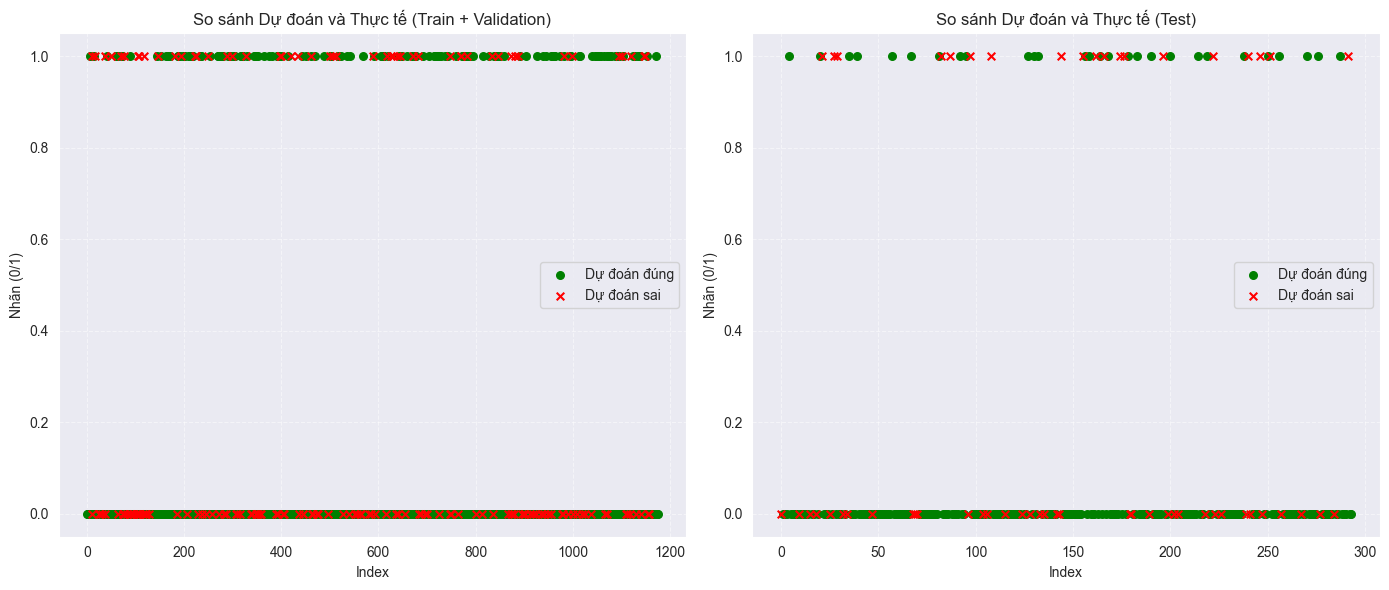

In [144]:
plot_prediction_comparison(
    model=rf_gini,
    X_train_val=X_train_origin_t1,
    y_train_val=y_train_origin_t1,
    X_test=X_test_origin_t1,
    y_test=y_test_origin_t1,
    threshold=0.49999999999999994
)

1. Phân tích trên tập kiểm tra (Test Results)
- Hiệu suất chung (Accuracy, Macro Avg F1)
    - Độ chính xác (Accuracy): Rất ổn định, dao động nhẹ quanh mức $0.812$ cho cả ba tỷ lệ chia ($8/2, 7/3, 6/4$). Điều này cho thấy mô hình ổn định bất kể sự thay đổi nhỏ về kích thước tập huấn luyện/kiểm tra.
    - Macro Average F1-score: Dao động từ $0.685$ đến $0.706$. Chỉ số này quan trọng vì nó tính trung bình không trọng số của F1-score giữa hai lớp, cho thấy hiệu suất tổng thể của mô hình trong việc phân loại cả hai lớp.
- Hiệu suất theo từng lớp (Lớp 0 và Lớp 1)
    - Lớp 0 (Precision $\approx 0.91-0.93$): Mô hình rất tốt trong việc dự đoán Lớp 0 (ít nhầm Lớp 1 thành Lớp 0).
    - Lớp 1 (Precision $\approx 0.43-0.44$): Mô hình kém trong việc dự đoán Lớp 1. Điều này có nghĩa là, khi mô hình dự đoán một mẫu là Lớp 1, khả năng cao ($\approx 56\%$) nó thực sự là Lớp 0 (lỗi False Positive cao).
    - Recall (Lớp 1 $\approx 0.56-0.66$): Mặc dù Precision thấp, Recall cho Lớp 1 lại tương đối khá (từ $0.56$ đến $0.66$). Điều này cho thấy mô hình tìm được hơn một nửa số mẫu Lớp 1 thực tế (lỗi False Negative không quá cao).
- Nhận xét: Sự chênh lệch lớn về Precision và F1-score giữa hai lớp cho thấy vấn đề mất cân bằng dữ liệu (Class Imbalance) giữa Lớp 0 và Lớp 1 (Lớp 0 có số lượng mẫu áp đảo). Mặc dù đã dùng class_weight='balanced', mô hình vẫn thiên về dự đoán Lớp 0 (lớp lớn) để đạt Accuracy cao.

2. Phân tích Tỷ lệ chia (8/2, 7/3, 6/4)
- Việc thay đổi tỷ lệ chia dữ liệu không làm thay đổi đáng kể hiệu suất trên tập kiểm tra:
    - Tỷ lệ 8/2 cho F1-score Lớp 1 cao nhất ($0.530$) và Recall Lớp 1 cao nhất ($0.660$).
    - Tỷ lệ 7/3 cho F1-score Lớp 1 thấp nhất ($0.491$).
    - Tỷ lệ 6/4 cho kết quả tương tự 8/2 nhưng có vẻ hơi kém hơn một chút.
    - Kết luận: Tỷ lệ 8/2 mang lại hiệu suất tốt nhất cho lớp mục tiêu (Lớp 1), mặc dù chỉ số này vẫn còn thấp.

3. Phân tích Đường cong ROC và Precision-Recall
- Đường cong ROC (ROC Curve):
    - AUC = $0.777$ (Area Under the Curve)
    - Chỉ số này ($0.777$) cho thấy mô hình có khả năng phân biệt giữa các lớp tốt hơn mức ngẫu nhiên ($0.5$) nhưng chưa phải là xuất sắc ($>0.9$).
- Precision-Recall Curve: Đường cong cho thấy Precision giảm nhanh khi Recall tăng lên, xác nhận lại rằng mô hình gặp khó khăn khi cố gắng tìm nhiều mẫu Lớp 1 (tăng Recall) mà vẫn duy trì độ chính xác (Precision).
- Tối ưu Ngưỡng (Optimal Threshold):
    - Ngưỡng tối ưu được tìm thấy gần $0.5$ trong tất cả các trường hợp.
    - Việc điều chỉnh ngưỡng tối ưu không cải thiện đáng kể các chỉ số so với ngưỡng mặc định ($0.5$), vì các Confusion Matrix và chỉ số sau khi tối ưu vẫn gần như không đổi.

4. Kết Luận Đánh Giá
- Mô hình Random Forest (GINI) hiện tại chưa hoàn toàn phù hợp với yêu cầu tối ưu của bài toán, đặc biệt nếu mục tiêu là dự đoán chính xác Lớp 1 (Minority Class).

- Sự không phù hợp chủ yếu đến từ hiệu suất kém đối với Lớp 1 (lớp thiểu số), được thể hiện qua chỉ số F1-score thấp và Precision Lớp 1 rất thấp.
    - Nếu bài toán chấp nhận Precision thấp và chỉ cần Accuracy tổng thể cao (ví dụ, dự đoán tổng quát): Mô hình có thể được xem là chấp nhận được.
    - Nếu bài toán yêu cầu phát hiện chính xác Lớp 1: Mô hình cần được cải thiện. Precision thấp có nghĩa là sẽ có rất nhiều cảnh báo sai (False Positives), gây tốn kém hoặc lãng phí nguồn lực trong thực tế.